In [45]:
import cv2 as cv
import numpy as np

input_path = 'Resources/furina.png'
output_path = 'results'

## Read, Write Image

In [46]:
img = cv.imread('Resources/furina.png') # B, G, R
cv.imwrite(f'{output_path}/written_image.jpg', img)
assert img is not None, "File Could not be Read, check path with os.path.exists()"

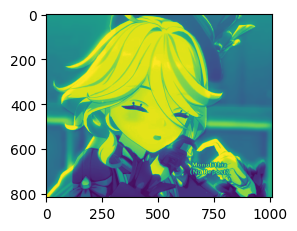

In [47]:
from matplotlib import pyplot as plt

plt.subplot(121)
grey = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(grey)

In [48]:
px = img[100, 100]
print(px)

[117 118 160]


In [49]:
# blue = img[100, 100, 0]
# print(blue)

[117 118 160]
(816, 1006, 3)
uint8


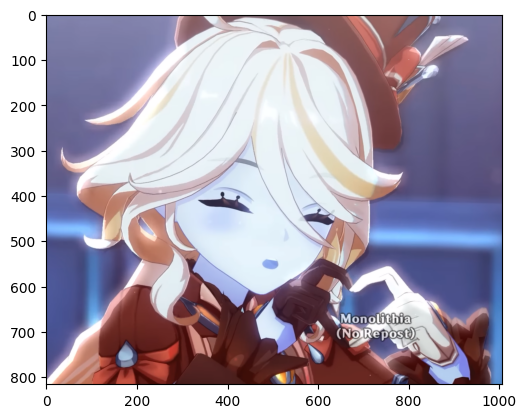

In [50]:
test = img.copy()
test[100, 800] = [255, 255, 255]
print(test[100, 100])
print(test.shape)
print(test.dtype)
plt.imshow(test)

### HW
Read about Color Space, Color Space Conversion

How Human Vision relate to Computer Vision

## Crop Image Region of Interest (ROI)

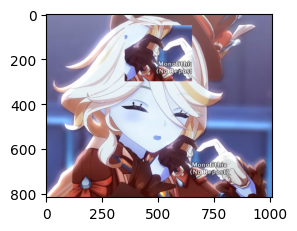

In [51]:

def crop_roi(x_origin, y_origin, x_target, y_target):
    yrange=250
    xrange=300
    luv = img[x_origin:500+yrange, y_origin:500+xrange]
    img[x_target:50+yrange, y_target:350+xrange] = luv
    plt.subplot(122)
    plt.imshow(img)
    
crop_roi(500, 500, 50, 350) # input: x,y origin and  x,y target

# Convert Color Space Back to HSL and RGB 

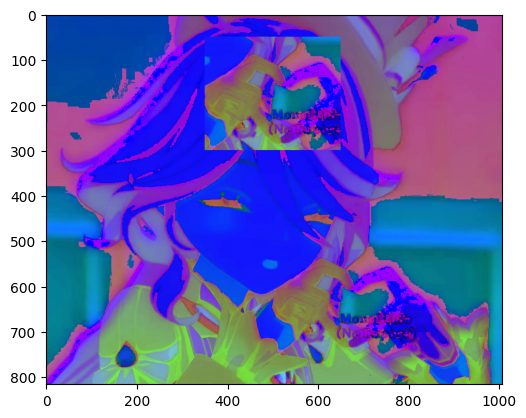

In [52]:
hsl_img = cv.cvtColor(img, cv.COLOR_BGR2HSV)
plt.imshow(hsl_img)

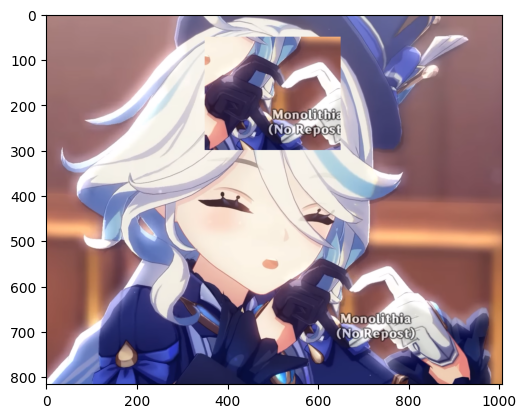

In [53]:
b, g, r = cv.split(img)
img = cv.merge((r, g, b))
plt.imshow(img)

In [54]:
img[:,:,1] = 0 # Height, Width, Color = [B, R, G]

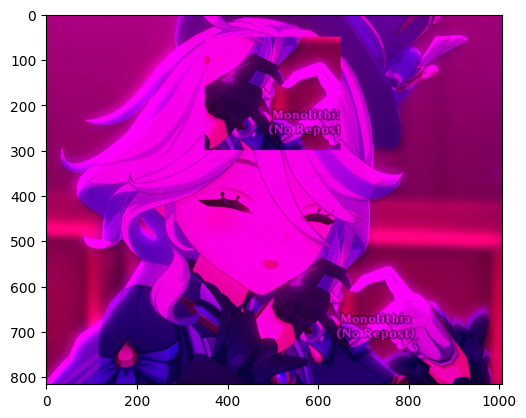

In [55]:
plt.imshow(img)

In [56]:
def read_and_display_greyscale(image_path):
    grey_image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)
    plt.imshow(grey_image, cmap='gray')
    plt.title('Grayscale Image')
    plt.axis('off')
    plt.show()

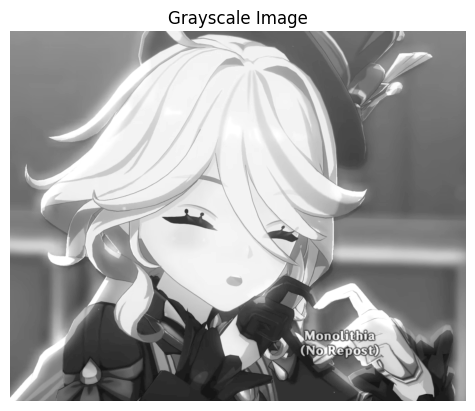

In [57]:
read_and_display_greyscale(input_path)

## Incease/Decrease Brightness and Contrast 

### Increase/Decrease Brightness

In [58]:
def increase_brightness(brightness, input_path, output_path):
    img = cv.imread(input_path)
    img = img.astype(float)
    
    img = img + brightness
    img = np.clip(img, 0, 255)
    
    img = img.astype(np.uint8)
    cv.imwrite(output_path, img)
    
    
def decrease_brightness(brightness, input_path, output_path):
    img = cv.imread(input_path)
    img = img.astype(float)
    
    img = img - brightness
    img = np.clip(img, 0, 255)
    
    img = img.astype(np.uint8)
    cv.imwrite(output_path, img)

In [59]:
increase_brightness(75, input_path, f'{output_path}/brightness_increase.jpg')
decrease_brightness(75, input_path, f'{output_path}/brightness_decrease.jpg')

In [60]:
def image_custom_brightness(image_path, output_path, brightness=50):
    # Step 1: Read image
    image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

    # Step 2: Convert the image to a 1D list (flattened array)
    flattened_image = image.flatten()

    # Step 3: Increase the brightness in the 1D list using a for loop
    brightened_1d = []
    for pixel_value in flattened_image:
        # Increase brightness and ensure pixel values are between 0 and 255
        brightened_pixel = pixel_value + brightness
        brightened_1d.append(np.clip(brightened_pixel, 0, 255))

    # Step 4: Reshape the 1D list back to the original grayscale image shape
    brightened_image = np.array(brightened_1d).reshape(image.shape)

    # Save the brightened image
    cv.imwrite(output_path, brightened_image)

    return brightened_image
    
    
# image_custom_brightness('Resources/furina.png', f'{output_path}/furina_custom_brightness.jpg', brightness=100)

### De/Increase Contrast

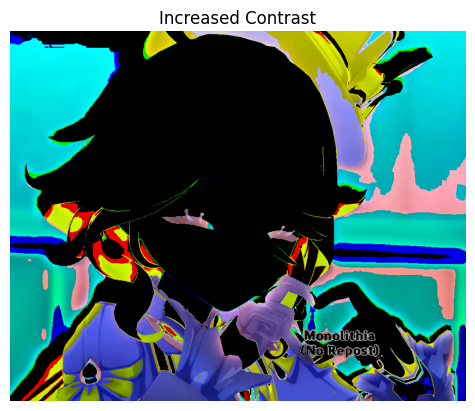

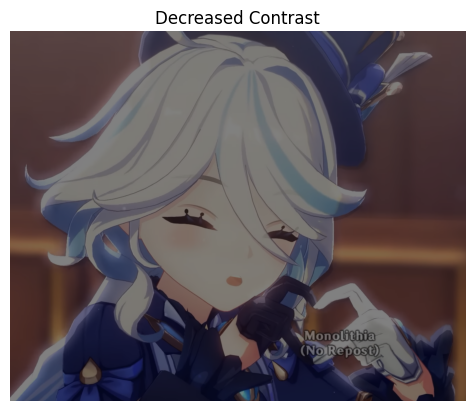

In [61]:
def increase_contrast(image_path, output_path, phi, contrast_factor=1.5):
    img = cv.imread(image_path)
    img = img.astype(float)
    
    # Increase contrast
    img = img * contrast_factor
    img = np.clip(img, 0, 255) + phi
    
    img = img.astype(np.uint8)
    cv.imwrite(output_path, img)
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.title('Increased Contrast')
    plt.axis('off')
    plt.show()

def decrease_contrast(image_path, output_path, phi, contrast_factor=0.5):
    img = cv.imread(image_path)
    img = img.astype(float)
    
    # Decrease contrast
    img = img * contrast_factor
    img = np.clip(img, 0, 255) + phi
    
    img = img.astype(np.uint8)
    cv.imwrite(output_path, img)
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.title('Decreased Contrast')
    plt.axis('off')
    plt.show()

# Example usage
increase_contrast(input_path, f'{output_path}/increased_contrast.jpg', 1, contrast_factor=2)
decrease_contrast(input_path, f'{output_path}/decreased_contrast.jpg', 1)

### Bitwise Operation


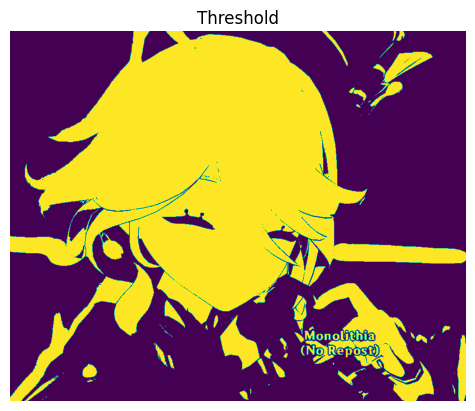

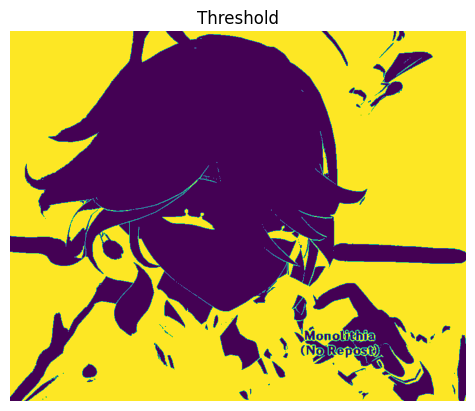

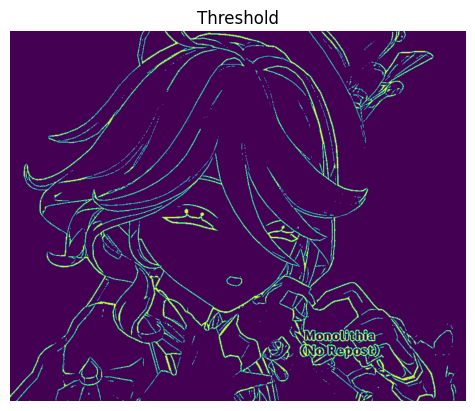

In [62]:
def threshold(input_path):
    # Read the image from the given path
    img = cv.imread(input_path)
    
    # Convert the image to grayscale
    img2gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    
    # Apply simple BINARY thresholding
    threshold, thresh = cv.threshold(img2gray, 150, 255, cv.THRESH_BINARY)
    
    # Apply simple BINARY INVERSE thresholding
    threshold, thres_inv = cv.threshold(img2gray, 150, 255, cv.THRESH_BINARY_INV)
    
    # Apply ADAPTIVE thresholding
    adaptive_thresh = cv.adaptiveThreshold(img2gray, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV, 11, 9)

    # Display the adaptive thresholded image
    plt.imshow(thresh)
    plt.title('Threshold')
    plt.axis('off')
    plt.show()
    
    
    plt.imshow(thres_inv)
    plt.title('Threshold')
    plt.axis('off')
    plt.show()
    
    plt.imshow(adaptive_thresh)
    plt.title('Threshold')
    plt.axis('off')
    plt.show()
    
threshold(input_path)

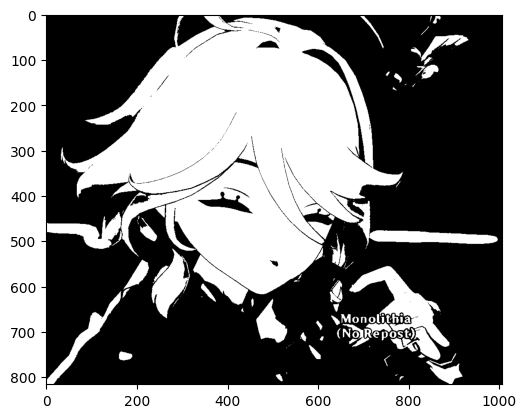

In [63]:
def custom_thresholding(input_path, min, max):
    img = cv.imread(input_path)
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    
    flatten_img = img.flatten()
    threshold_image = []
    for pixel_value in flatten_img:
        pixel = 0
        if min <= pixel_value <= max:
            pixel = 1
        threshold_image.append(pixel)
        
    thres = np.array(threshold_image).reshape(img.shape) # Must convert back to ndarray
    plt.imshow(thres, cmap='gray')
    plt.show()
    
    
custom_thresholding(input_path, 180, 255)